References: 
https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv/data

Step 1: Data Preprocessing and Feature Transformation

Load the Data: Start by loading the dataset into a Pandas DataFrame.
Handling Missing Values: Check for any missing values and handle them appropriately (e.g., imputation or removing rows).
Feature Encoding:
The purpose column is categorical, so you’ll need to convert it into numerical values using one-hot encoding or label encoding.
Use pd.get_dummies() for one-hot encoding or LabelEncoder from sklearn for label encoding.

In [29]:
import numpy as np # linear algebra - v1.1
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) - v1.1
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('loan_data.csv')

# Label encode the 'purpose' column
label_encoder = LabelEncoder()
df['purpose'] = label_encoder.fit_transform(df['purpose'])


Step 2: Exploratory Data Analysis (EDA)


In [42]:
# Check for missing values
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Class Imbalance: Check the distribution of the target variable (default vs. non-default). You might find a class imbalance problem.
Visualize the distribution of the target using a bar plot.
Feature Distributions: Plot histograms for numerical features (e.g., int.rate, fico, installment, etc.) to understand their distribution.
Correlation Analysis: Create a correlation matrix using df.corr() to check relationships between numerical features.

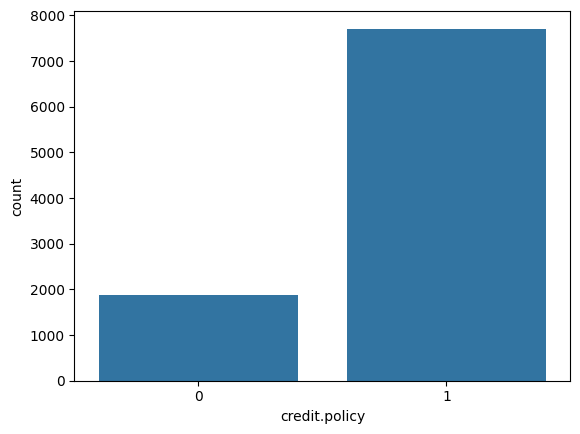

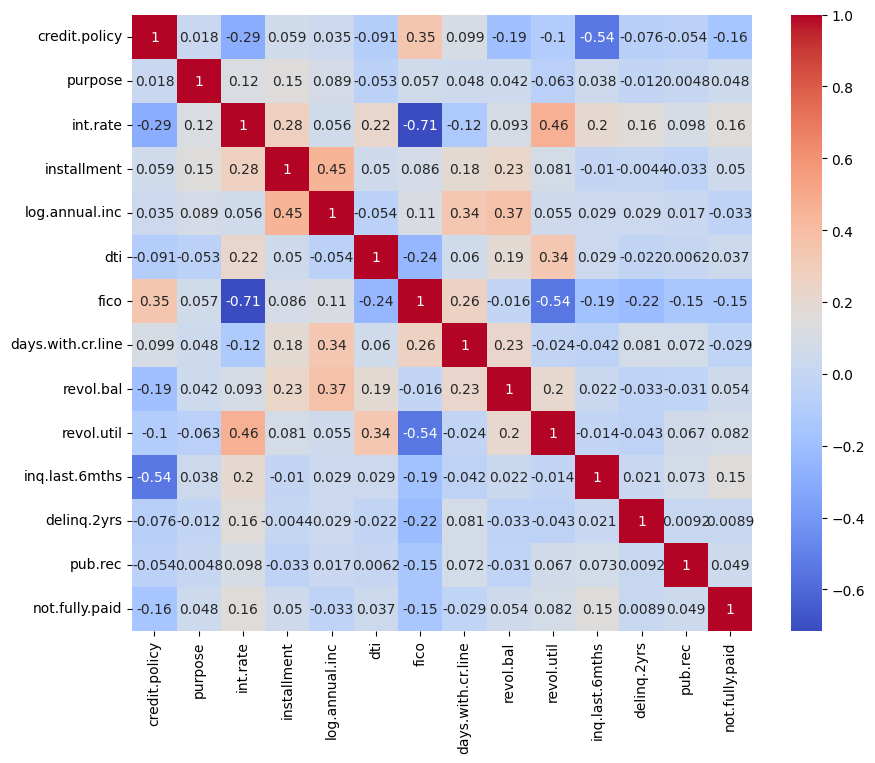

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # - v1.1
warnings.filterwarnings('ignore') # - v1.1

# Visualize class imbalance
sns.countplot(x='credit.policy', data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


Step 3: Additional Feature Engineering

Remove Highly Correlated Features: Drop features that are highly correlated (e.g., correlation coefficient > 0.8) to avoid multicollinearity.
Normalization: Normalize or scale features like installment, log.annual.inc, dti, etc., so that the deep learning model can learn better.

In [31]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


Step 4: Build the Deep Learning Model

Split the Data: Use train_test_split to divide the dataset into training and test sets.

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('credit.policy', axis=1)
y = df['credit.policy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Deep Learning Model: Use Keras with TensorFlow backend to create a deep learning model.
The input layer should match the number of features.
Add a few hidden layers with ReLU activation.
Use a final output layer with a single unit and sigmoid activation (since it’s a binary classification problem).

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the deep learning model
model = Sequential()

# Input layer and hidden layers
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8677 - loss: 0.3469 - val_accuracy: 0.9071 - val_loss: 0.2378
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9146 - loss: 0.2166 - val_accuracy: 0.9207 - val_loss: 0.2103
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9230 - loss: 0.1992 - val_accuracy: 0.9327 - val_loss: 0.1800
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9367 - loss: 0.1683 - val_accuracy: 0.9332 - val_loss: 0.1722
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9483 - loss: 0.1378 - val_accuracy: 0.9410 - val_loss: 0.1444
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9548 - loss: 0.1285 - val_accuracy: 0.9358 - val_loss: 0.1592
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9584 - loss: 0.1142 - val_accuracy: 0.9478 - val_loss: 0.1287
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9596 - loss: 0.1093 - val_accuracy: 0.

Step 5: Model Evaluation

Evaluate the Model: Once the model is trained, evaluate its performance on the test set.


In [34]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.9606 - loss: 0.1187
Test Accuracy: 0.9582463502883911


Handling Imbalanced Dataset: You may need to handle the imbalanced dataset by:
Resampling: Use oversampling or undersampling techniques.
Class Weights: Apply class weights in the model training.

In [35]:
# Add class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


# Ensure y_train is a NumPy array
y_train = np.array(y_train)

# Check unique labels in y_train
unique_labels = np.unique(y_train)



# Compute class weights using the unique labels
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weight_dict = dict(enumerate(class_weights))
class_weights = compute_class_weight('balanced', classes=unique_labels, y=y_train)
class_weight_dict = dict(zip(unique_labels, class_weights))

# Check the class weights
print(class_weight_dict)

# Ensure that class_weight_dict is correctly passed to the fit method.
# Train model with class weights
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, class_weight=class_weight_dict)



{0: 2.560828877005348, 1: 0.6213104119364256}
Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9469 - loss: 0.1410 - val_accuracy: 0.9342 - val_loss: 0.1669
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9561 - loss: 0.1096 - val_accuracy: 0.9478 - val_loss: 0.1329
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9623 - loss: 0.1057 - val_accuracy: 0.9457 - val_loss: 0.1424
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9614 - loss: 0.1028 - val_accuracy: 0.9473 - val_loss: 0.1364
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9677 - loss: 0.0884 - val_accuracy: 0.9342 - val_loss: 0.1622
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9681 - loss: 0.0810 - val_accuracy: 0.9395 - val_loss: 0.1533
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9680 - loss: 0.0848 - val_accuracy: 0.9436 - val_loss: 0.1414
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

Step 6: Model Tuning and Optimization
Hyperparameter Tuning: You can experiment with different numbers of layers, neurons, optimizers, learning rates, and batch sizes.
Cross-Validation: Use K-Fold cross-validation to assess the model’s performance across different data splits.

By following these steps, you'll be able to build a deep learning model that predicts loan default effectively, accounting for the imbalanced nature of the dataset.

1. Hyperparameter Tuning
Use GridSearchCV or RandomizedSearchCV from Scikit-Learn in combination with Keras to perform hyperparameter tuning. Since Keras models are not directly compatible with Scikit-Learn, you will use KerasClassifier from tensorflow.keras.wrappers.scikit_learn to wrap the model.

Using RandomizedSearchCV for Hyperparameter Tuning

In [36]:
# !pip install keras-tuner
# !pip install scikeras

In [39]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to create model, with hyperparameters as arguments
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap Keras model with KerasClassifier using scikeras
model = KerasClassifier(model=create_model, verbose=0)

# Define the grid of hyperparameters, using 'model__' prefix for model-specific parameters
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu', 'tanh']
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=1)
random_search_result = random_search.fit(X_train, y_train)

# Best parameters and model
best_params = random_search_result.best_params_
best_model = random_search_result.best_estimator_

print("Best Parameters:", best_params)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'model__optimizer': 'adam', 'model__activation': 'relu', 'epochs': 20, 'batch_size': 16}


2. Cross-Validation
Cross-validation helps in assessing how the model generalizes to an independent dataset. For Keras models, cross-validation can be done using StratifiedKFold from Scikit-Learn. Since deep learning models can be computationally expensive, use fewer folds (e.g., 3-5 folds).

In [41]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Convert to numpy arrays if not already
X_train_array = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_train_array = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

# Define the Keras model
def create_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train_array.shape[1],), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize KerasClassifier
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)

# Define StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
results = []
for train_idx, test_idx in kfold.split(X_train_array, y_train_array):
    history = model.fit(X_train_array[train_idx], y_train_array[train_idx])
    score = model.score(X_train_array[test_idx], y_train_array[test_idx])
    results.append(score)

print(f"Cross-Validation Scores: {results}")
print(f"Mean Accuracy: {np.mean(results)}")


Cross-Validation Scores: [0.9412915851272016, 0.9406392694063926, 0.9399477806788512, 0.9523498694516971, 0.9516971279373369]
Mean Accuracy: 0.9451851265202957


Summary
Hyperparameter Tuning: Use RandomizedSearchCV or GridSearchCV to search for the best combination of hyperparameters like batch size, number of epochs, optimizer, and activation function.
Cross-Validation: Use StratifiedKFold for performing k-fold cross-validation to evaluate the model’s generalization ability.
Both approaches help in improving model performance and finding the optimal hyperparameters for your deep learning model.






